<h3>Libraries imported</h3>

In [18]:
import pandas as pd

import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<h3>Reading data from CSV</h3>
Removing unnecessary columns<br>
Renaming column-names to something meaningful

In [13]:
data = pd.read_csv("../input/spam.csv",encoding = "latin")
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data = data.rename(columns = {'v1':'Spam/Ham','v2':'message'})
data.head()

,Spam/Ham,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3>Preprocessing</h3>

**Removing punctuation and stop words**

In [7]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

data_2 = data['message'].copy()
data_2 = data_2.apply(text_preprocess)

**Vectorizing the data**<br>
Collecting each word and its frequency in each email.<br>
The vectorization will produce a matrix.

In [10]:
vectorizer = TfidfVectorizer("english")
data_matrix = vectorizer.fit_transform(data_2)

<h3>Test/Train Split</h3>

Dividing data into test-train sets, 30% and 70%

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data_matrix, data['Spam/Ham'], test_size=0.3)

<h3>Logistic Regression</h3>

**Fit the model according to "data" variable obtained from CSV.**

In [16]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Checking accuracy score metrics**

Accuracy score :  0.9419856459330144 
Accuracy %ge =  94.19856459330144 %


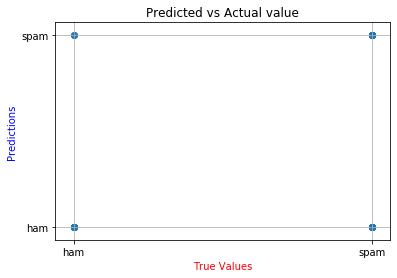

In [21]:
predictions = logistic.predict(X_test)
acc = accuracy_score(Y_test, predictions)
print("Accuracy score : ",acc,"\nAccuracy %ge = ",acc*100,"%")

# Scatter Plot
plt.scatter(Y_test, predictions)
plt.xlabel("True Values",color='red')
plt.ylabel("Predictions",color='blue')
plt.title("Predicted vs Actual value")
plt.grid(True)
plt.show()